## K Means Clustering Algorithm:

**Clustering** is an **unsupervised** machine learning method of identifying and grouping similar data points in larger datasets without concern for the specific outcome.
<br /> 
A **Cluster** is a collection of data points aggregated together because of some **similarities**. 
<br />
**K** means the number of clusters
<br />
**Means** refers to the centroids of clusters

### When should I use it?
* Your data is numeric. It doesn't work with categorical features. We're computing the distance between real numbers!
* If you don't have labels for your data
* K-means is the simplest. To implement and to run. All you need to do is choose "k" and run it a number of times.
* K-means and other clustering algorithms shine when you have multivariate data. They will "work" with 1-dimensional data, but they are not very smart anymore.
* useful when you have an idea of how many clusters actually exists in your space.

### Algorithm:
1. randomly choose k centroids
2. compute the distance (e.g. Euclidian) from each points to the centroids
3. allocate each points to the nearest cluster
4. update the centroids to the mean points of the new clusters
5. stop until converged (none of the cluster assignments change)

In [51]:
import numpy as np
from scipy.spatial.distance import cdist
 
def kmeans(x,k, no_of_iterations):
    index = np.random.choice(len(x), k, replace=False)
    centroids = x[index, :]
     
    distances = cdist(x, centroids ,'euclidean')
     
    points = np.array([np.argmin(i) for i in distances])
     
    for _ in range(no_of_iterations): 
        centroids = []
        for index in range(k):
            temp_cent = x[points==index].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids)
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
        
        yield points
         
    # return points 

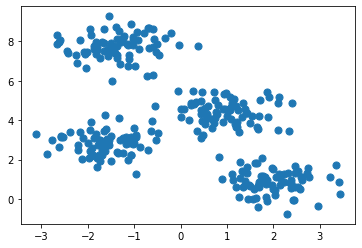

In [63]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

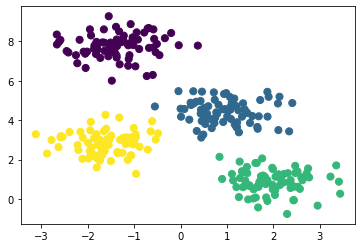

In [64]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=4)
# kmeans.fit(X)
# y_kmeans = kmeans.predict(X)

from IPython import display
no_of_iteration = 5
for X_predict in kmeans(X, 4, no_of_iteration):
    plt.scatter(X[:, 0], X[:, 1], c=X_predict, s=50, cmap='viridis')
    display.clear_output(wait=True)
    plt.pause(0.5)
plt.show()

### Determine best value for k:
**The Elbow Method**
![elbow](https://pythonprogramminglanguage.com/wp-content/uploads/2017/07/elbow-method.png)

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE). <br />
The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset. So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

#### Reference:
1. https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
2. https://www.askpython.com/python/examples/k-means-clustering-from-scratch
3. https://github.com/UCLAIS/Machine-Learning-Tutorials/blob/master/notebooks/Session03-Clustering.ipynb
https://bl.ocks.org/rpgove/0060ff3b656618e9136b